## Step 1. Initializing the imports

In [1]:
%reset
low_memory=False
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Step 2. Reading the dataframe

In [6]:
df = pd.read_csv('Summary of Weather.csv', header=0)
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3. Analyzing the dataset
There are 31 variables in the dataset. Some of them are non-numerical(like date), so we throw them off. Most of the variables have too few observations. The most obvious variables that could have a correlation are MinTemp and MaxTemp, which makes sense because it is logical that if the minimal temperature is higher, the maximal temperature should also be higher. 

I will make MinTemp the independent variable, because the day starts with a lower temperature and we want to see how high it will raise during the day.

Text(0, 0.5, 'MaxTemp')

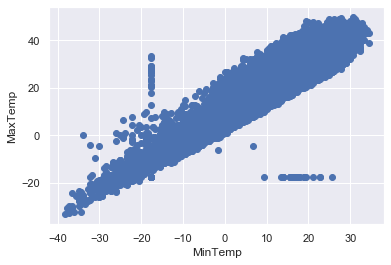

In [44]:
plt.scatter(df['MinTemp'].values, df['MaxTemp'].values)
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")

Looks like the variables have some linear correlation. However, we can see that there are outliers, which are probably just errors in the dataset.

## Step 4. Fitting the regression model.
Before that I reshape the arrays into 2D, because Scikit wants 2D arrays.

In [22]:
mintemp = df['MinTemp'].values.reshape(-1,1)
maxtemp = df['MaxTemp'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(mintemp, maxtemp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print("Intercept: {}".format(regressor.intercept_))
print("Slope: {}".format(regressor.coef_[0]))

Intercept: [10.70056704]
Slope: [0.91877423]


Now we have our coefficients. It looks like the maximal temperature during the day becomes a bit closer to minimal temperature when the minimal temperature becomes higher.

## Step 5. Visualizing the findings
Before drawing a plot, I have to calculate the predicted values of MaxTemp using the coefficients above.

In [29]:
maxtemp_predicted = []
for obs in mintemp:
    maxtemp_predicted.append(obs*regressor.coef_[0]+regressor.intercept_)

Text(0, 0.5, 'MaxTemp')

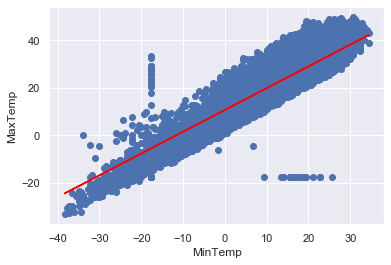

In [31]:
plt.scatter(mintemp, maxtemp)
plt.plot(mintemp, maxtemp_predicted, color='red')
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")

## Step 6. Calculating the coefficient of determination ($R^2$) and MSE and making conclusions

In [42]:
print('Coefficient of determination:', regressor.score(mintemp, maxtemp))

Coefficient of determination: 0.7715582862315506


We can see that the $R^2$ value is probably not as high as we would ideally want it to be, but it is at least satisfactory. I suppose that may have happened partly because of the outliers.

In [40]:
print('Mean squared error:', mean_squared_error(maxtemp, maxtemp_predicted))

Mean squared error: 17.36149912658331


The mean squared error is above 17, which makes the mean error slightly above 4. It is hard to say whether this is significant without further analysis.

Overall, I would say that the model worked quite well. The $R^2$ is high enough to support that statement.